In [538]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [539]:
df = pd.read_csv('dengue_features_train (1).csv')

In [540]:
df2 = pd.read_csv('dengue_labels_train.csv')

In [537]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [541]:
df['total_cases'] = df2['total_cases']

In [535]:
df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

### Analyze the trend of number of cases over the weeks over the years
 We will plot the features over the same X axis

In [7]:
df['weekofyear'].value_counts().sort_values(ascending=True)

53     5
52    23
40    28
42    28
20    28
21    28
22    28
23    28
24    28
25    28
26    28
27    28
28    28
29    28
43    28
31    28
32    28
33    28
34    28
35    28
36    28
37    28
38    28
39    28
41    28
30    28
18    28
17    28
19    28
46    28
47    28
48    28
49    28
50    28
51    28
1     28
2     28
3     28
4     28
5     28
6     28
7     28
8     28
9     28
10    28
11    28
12    28
13    28
14    28
15    28
16    28
45    28
44    28
Name: weekofyear, dtype: int64

### Univariate analysis

(array([733., 425., 200.,  57.,  16.,   7.,   2.,   1.,   0.,   2.]),
 array([  0.  ,  39.06,  78.12, 117.18, 156.24, 195.3 , 234.36, 273.42,
        312.48, 351.54, 390.6 ]),
 <BarContainer object of 10 artists>)

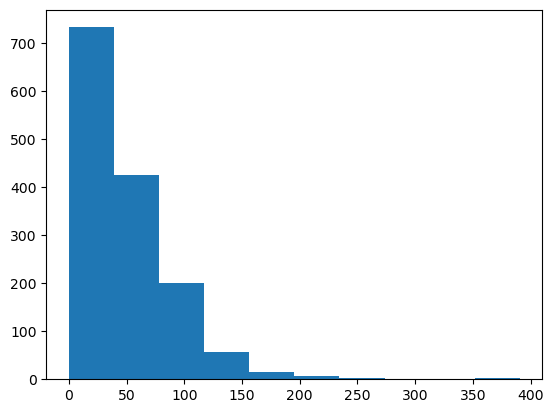

In [12]:
# precipitation hist
plt.hist(df.precipitation_amt_mm)

(array([  3.,  19.,  65., 214., 292., 281., 316., 217.,  33.,   6.]),
 array([294.89285714, 295.69642857, 296.5       , 297.30357143,
        298.10714286, 298.91071429, 299.71428571, 300.51785714,
        301.32142857, 302.125     , 302.92857143]),
 <BarContainer object of 10 artists>)

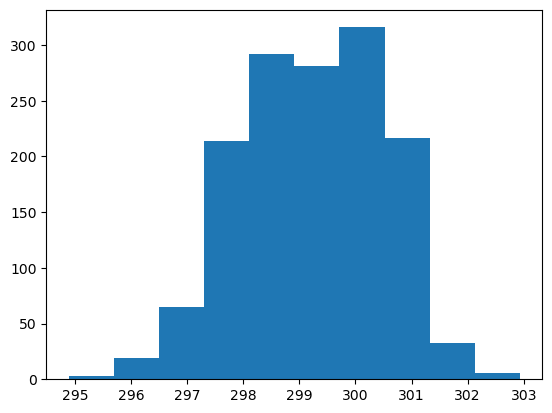

In [16]:
plt.hist(df.reanalysis_avg_temp_k)

(array([  5.,  15.,  40.,  98., 191., 180., 241., 430., 232.,  14.]),
 array([289.64285714, 290.52357143, 291.40428571, 292.285     ,
        293.16571429, 294.04642857, 294.92714286, 295.80785714,
        296.68857143, 297.56928571, 298.45      ]),
 <BarContainer object of 10 artists>)

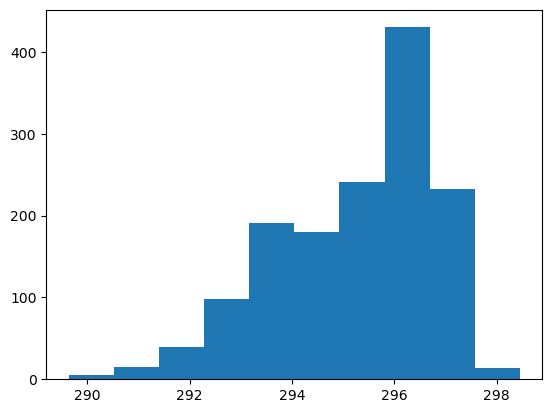

In [17]:
plt.hist(df.reanalysis_dew_point_temp_k)

(array([1.136e+03, 2.290e+02, 4.900e+01, 2.300e+01, 5.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.  ,  57.05, 114.1 , 171.15, 228.2 , 285.25, 342.3 , 399.35,
        456.4 , 513.45, 570.5 ]),
 <BarContainer object of 10 artists>)

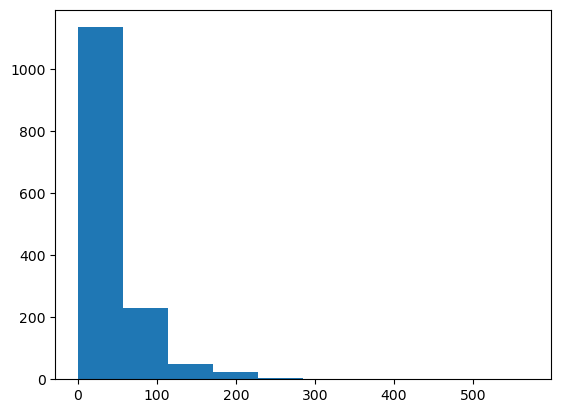

In [18]:
plt.hist(df.reanalysis_precip_amt_kg_per_m2)

(array([1266.,  132.,   26.,   12.,    5.,    3.,    2.,    5.,    3.,
           2.]),
 array([  0. ,  46.1,  92.2, 138.3, 184.4, 230.5, 276.6, 322.7, 368.8,
        414.9, 461. ]),
 <BarContainer object of 10 artists>)

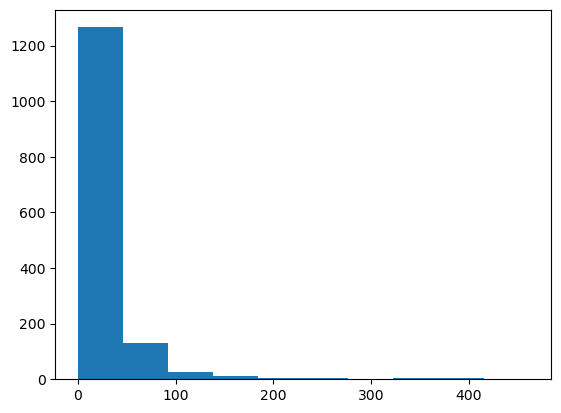

In [26]:
plt.hist(df.total_cases)

In [30]:
df['city'].value_counts()

sj    936
iq    520
Name: city, dtype: int64

In [40]:
data = df.groupby(by='weekofyear', as_index=False).mean()

<BarContainer object of 53 artists>

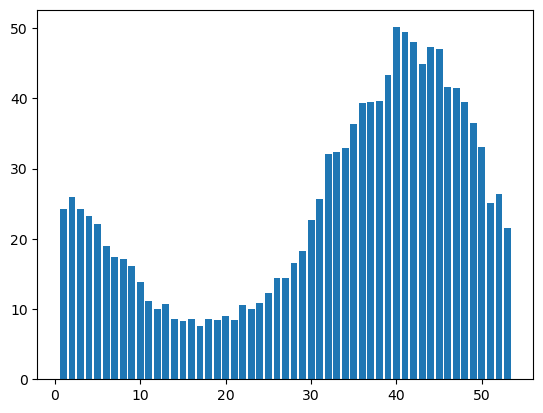

In [42]:
plt.bar(data['weekofyear'], data['total_cases'])

In [46]:
peru = df[df['city'] == 'iq'].groupby(by=['weekofyear'], as_index=False).mean()
rico = df[df['city'] == 'sj'].groupby(by='weekofyear', as_index=False).mean()

<BarContainer object of 53 artists>

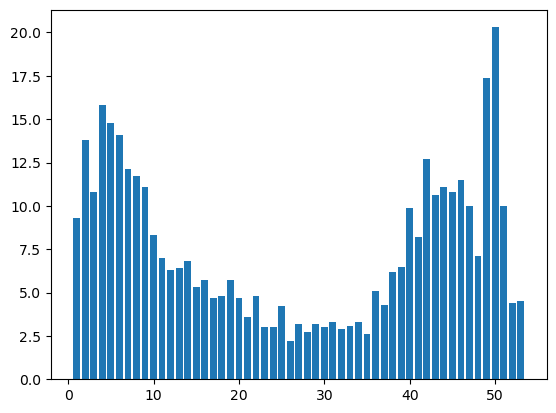

In [47]:
plt.bar(peru['weekofyear'], peru['total_cases'])

<BarContainer object of 53 artists>

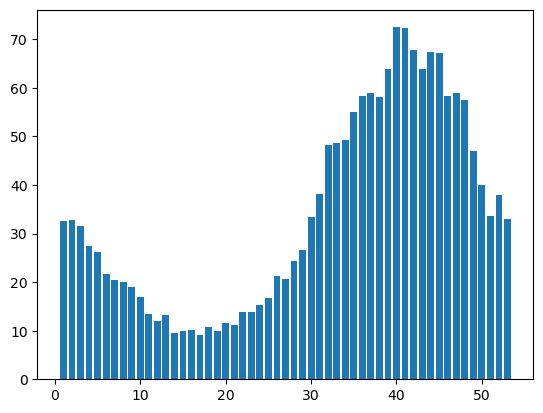

In [48]:
plt.bar(rico['weekofyear'], rico['total_cases'])

### Line plots with cities as hue

In [352]:
data_city = df.groupby(by=['weekofyear', 'city'], as_index=False).mean()

<AxesSubplot:xlabel='weekofyear', ylabel='total_cases'>

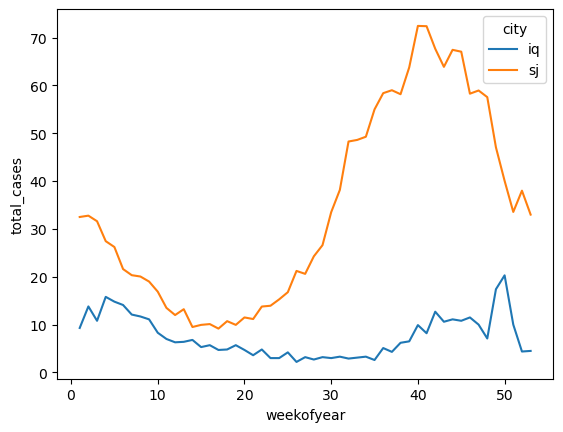

In [53]:
sns.lineplot(data=data_city, x='weekofyear', y='total_cases', hue='city')

In [ ]:
sns.lineplot(data=data_city, x='weekofyear', y='total_cases', hue='city')

<AxesSubplot:>

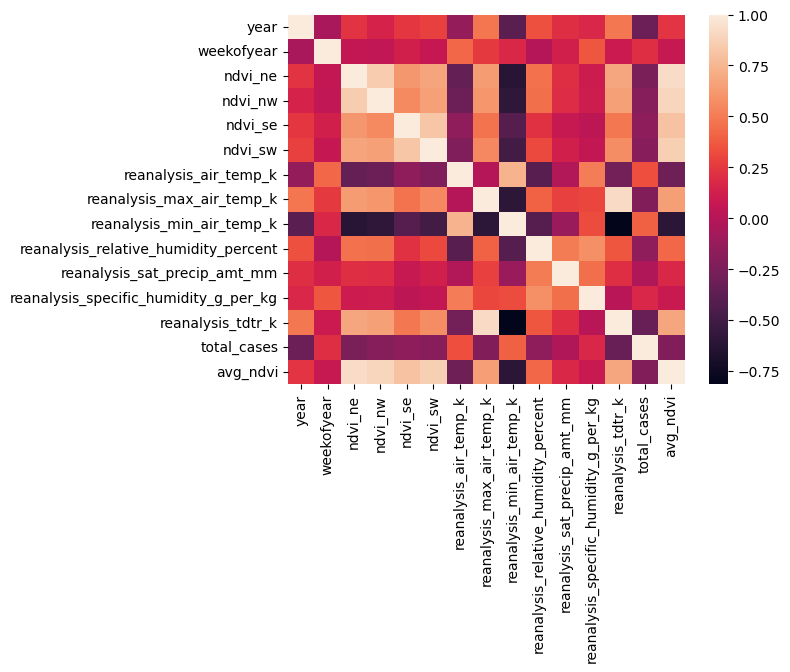

In [350]:
sns.heatmap(df.corr())

In [78]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    #au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    au_corr.loc[:,:] = np.tril(au_corr.values, k=-1)
    cor = cor[cor>0]
    return au_corr[0:n]

In [92]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)


In [93]:
print(so[25:])

reanalysis_specific_humidity_g_per_kg  reanalysis_dew_point_temp_k              0.997051
reanalysis_dew_point_temp_k            reanalysis_specific_humidity_g_per_kg    0.997051
reanalysis_tdtr_k                      reanalysis_max_air_temp_k                0.918578
reanalysis_max_air_temp_k              reanalysis_tdtr_k                        0.918578
reanalysis_air_temp_k                  reanalysis_avg_temp_k                    0.901777
reanalysis_avg_temp_k                  reanalysis_air_temp_k                    0.901777
reanalysis_tdtr_k                      station_diur_temp_rng_c                  0.881176
station_diur_temp_rng_c                reanalysis_tdtr_k                        0.881176
ndvi_ne                                ndvi_nw                                  0.850902
ndvi_nw                                ndvi_ne                                  0.850902
reanalysis_max_air_temp_k              station_diur_temp_rng_c                  0.834263
station_diur_temp_rng

In [419]:
df.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
reanalysis_air_temp_k                    5
reanalysis_max_air_temp_k                5
reanalysis_min_air_temp_k                5
reanalysis_relative_humidity_percent     5
reanalysis_sat_precip_amt_mm             8
reanalysis_specific_humidity_g_per_kg    5
reanalysis_tdtr_k                        5
total_cases                              0
avg_ndvi                                 0
month                                    0
dtype: int64

In [542]:
# dropping dew point, diur_temp
df = df.drop(['reanalysis_dew_point_temp_k'], axis=1)

# diur_temp
df = df.drop(['station_diur_temp_rng_c', 'station_precip_mm', 'precipitation_amt_mm'], axis=1)

# remove station values
df = df.drop(['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c'], axis=1)

# remove avg temp
df = df.drop('reanalysis_avg_temp_k', axis=1)

# remove reanalysis_precip_amt_kg_per_m2
df = df.drop('reanalysis_precip_amt_kg_per_m2', axis=1)

In [543]:
df = df.drop(df[(df['ndvi_se'].isnull())].index)

In [544]:
df['avg_ndvi'] = 0

In [545]:
for i in range(df.shape[0]):
    if not(math.isnan(df.iloc[i, 4])) and not(math.isnan(df.iloc[i, 5])):
        df.iloc[i,16] = (df.iloc[i, 4] + df.iloc[i, 5] + df.iloc[i, 6] + df.iloc[i, 7])/4
    elif math.isnan(df.iloc[i, 4]) and math.isnan(df.iloc[i, 5]):
        df.iloc[i,16] = (df.iloc[i, 6] + df.iloc[i, 7])/2
    elif math.isnan(df.iloc[i, 4]) and not(math.isnan(df.iloc[i, 5])):
        df.iloc[i,16] = (df.iloc[i, 5] + df.iloc[i, 6] + df.iloc[i, 7])/3
    else:
        df.iloc[i,16] = (df.iloc[i, 4] + df.iloc[i, 6] + df.iloc[i, 7])/3

In [546]:
# drop ndvis
df = df.drop(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], axis = 1)

### Bivariate

<AxesSubplot:xlabel='avg_ndvi', ylabel='total_cases'>

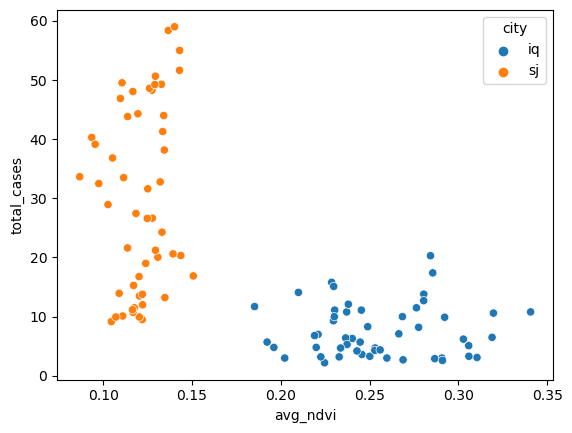

In [356]:
sns.scatterplot(data=data_city, x='avg_ndvi', y='total_cases', hue='city')

In [362]:
data_year = df.groupby(by=['year', 'city'], as_index=False).mean()

<AxesSubplot:xlabel='reanalysis_specific_humidity_g_per_kg', ylabel='total_cases'>

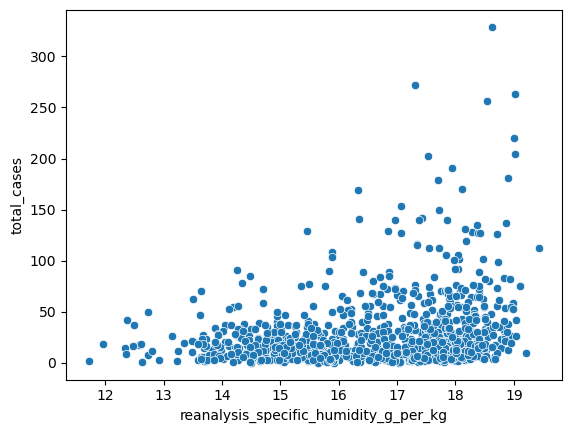

In [380]:
sns.scatterplot(data=df[df['city'] == 'sj'], x='reanalysis_specific_humidity_g_per_kg', y='total_cases')

<AxesSubplot:xlabel='reanalysis_air_temp_k', ylabel='total_cases'>

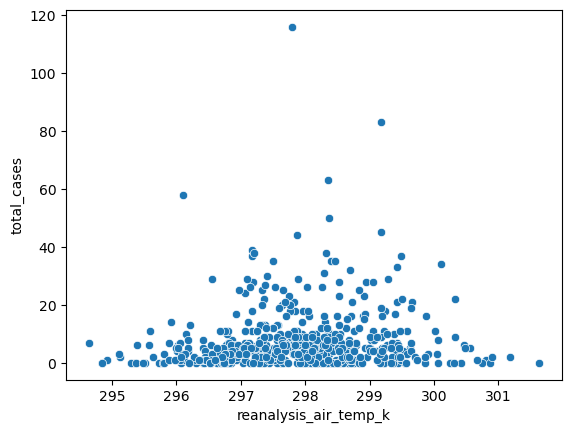

In [386]:
sns.scatterplot(data=df[df['city'] == 'iq'], x='reanalysis_air_temp_k', y='total_cases')

<AxesSubplot:xlabel='reanalysis_sat_precip_amt_mm', ylabel='total_cases'>

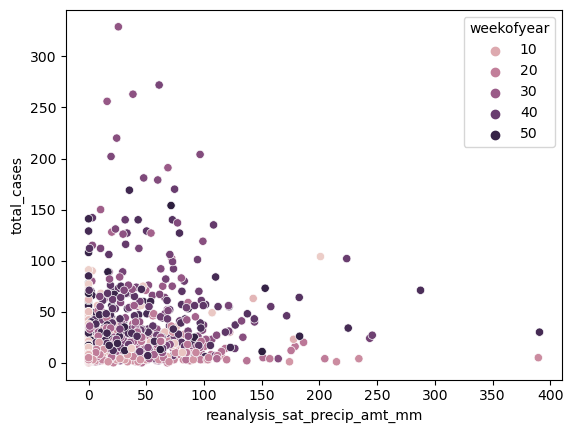

In [393]:
sns.scatterplot(data=df[df['city'] == 'sj'], x='reanalysis_sat_precip_amt_mm', y='total_cases', hue='weekofyear')

In [119]:
df.head()

city  year  weekofyear week_start_date  reanalysis_air_temp_k  \
0   sj  1990          18      1990-04-30             297.572857   
1   sj  1990          19      1990-05-07             298.211429   
2   sj  1990          20      1990-05-14             298.781429   
3   sj  1990          21      1990-05-21             298.987143   
4   sj  1990          22      1990-05-28             299.518571   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      299.8                      295.9   
1                      300.9                      296.4   
2                      300.5                      297.3   
3                      301.4                      297.0   
4                      301.9                      297.5   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             73.365714                         12.42   
1                             77.368571                         22.82   
2                             82.052857                         34.54   
3                             80.337143                         15.36   
4                             80.460000                          7.52   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  total_cases  \
0                              14.012857           2.628571            4   
1                              15.372857           2.371429            5   
2                              16.848571           2.300000            4   
3                              16.672857           2.428571            3   
4                              17.210000           3.014286            6   

   avg_ndvi month dist_from_monsoon  
0  0.150606    04                24  
1  0.157479    05                23  
2  0.133315    05                22  
3  0.209286    05                21  
4  0.239235    05                20

In [116]:
df.shape

(1434, 15)

<AxesSubplot:xlabel='dist_from_monsoon', ylabel='total_cases'>

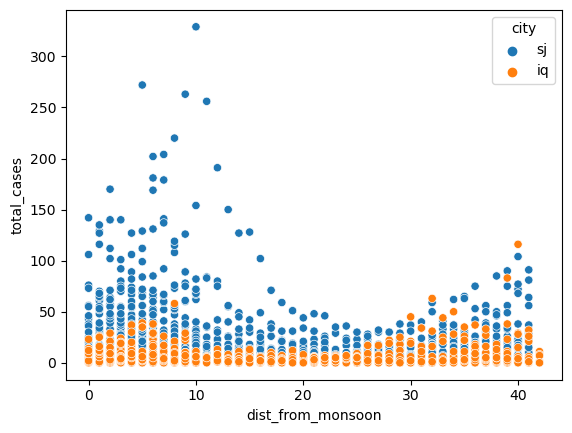

In [124]:
sns.scatterplot(data=df, x='dist_from_monsoon', y='total_cases', hue='city')

In [547]:
df['month'] = 0
for i in range(df.shape[0]):
    
    df.iloc[i,13] = df.iloc[i, 3].split('-')[1]
df['dist_from_monsoon'] = ''

In [548]:
#binning weeks into months
for i in range(df.shape[0]):
    if df.iloc[i, 0] == 'iq':
        df.iloc[i, 14] = abs(df.iloc[i, 2] - 10)
    else:
        df.iloc[i, 14] = abs(df.iloc[i, 2] - 42)
df2 = df.drop(['weekofyear', 'week_start_date'], axis=1)

In [549]:
factor_cols = df2[['city', 'month', 'year']]
dummies = pd.get_dummies(factor_cols, drop_first=True)
df2 = df2.drop(['city', 'month', 'year'], axis=1)
df2 = pd.concat([df2, dummies], axis=1)

In [550]:
# scale our data
columns_scaling = ['reanalysis_air_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_relative_humidity_percent', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'dist_from_monsoon']
scaler = StandardScaler()
df3 = scaler.fit_transform(df2[columns_scaling])

In [551]:
df3 = pd.DataFrame(data=df3, columns=columns_scaling)

In [552]:
df4 = pd.concat([df3, df2[['total_cases', 'avg_ndvi', 'city_sj', 'month_02', 'month_03', 'month_04', 'month_05', 'month_06', 'month_07', 'month_08', 'month_09', 'month_10', 'month_11', 'month_12', 'year']]], axis=1)

df4 = df4.dropna()

In [553]:
df4 = df4.drop(['month_02', 'month_03', 'month_04', 'month_05', 'month_06', 'month_07', 'month_08', 'month_09', 'month_10', 'month_11', 'month_12', 'avg_ndvi', 'city_sj', 'reanalysis_tdtr_k', 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_min_air_temp_k', 'reanalysis_sat_precip_amt_mm'], axis=1)


In [513]:
df4.head()

reanalysis_air_temp_k  reanalysis_max_air_temp_k  dist_from_monsoon  \
0              -0.823450                  -1.124907           0.481025   
1              -0.356028                  -0.785800           0.401456   
2               0.061202                  -0.909112           0.321886   
3               0.211781                  -0.631660           0.242316   
4               0.600776                  -0.477520           0.162746   

   total_cases    year  
0          4.0  1990.0  
1          5.0  1990.0  
2          4.0  1990.0  
3          3.0  1990.0  
4          6.0  1990.0

In [520]:
#RF

avg = 0
X = df4.drop(['total_cases'], axis=1)
y = df4['total_cases']
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

    rf = RandomForestRegressor(n_estimators=220, min_samples_split=5)
    rf.fit(X_train, y_train)

    preds = rf.predict(X_test)

    avg += mean_absolute_error(y_test, (preds).astype(int))

avg/10

8.259715639810427

In [554]:
#XG Boost

avg = 0
X = df4.drop(['total_cases'], axis=1)
y = df4['total_cases']
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

    rf = GradientBoostingRegressor(n_estimators=220, min_samples_split=5)
    rf.fit(X_train, y_train)

    preds = rf.predict(X_test)

    avg += mean_absolute_error(y_test, (preds).astype(int))

avg/10

10.554028436018957

In [566]:
#ADA Boosting

avg = 0
X = df4.drop(['total_cases'], axis=1)
y = df4['total_cases']
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

    rf = AdaBoostRegressor()
    rf.fit(X_train, y_train)

    preds = rf.predict(X_test)

    avg += mean_absolute_error(y_test, (preds).astype(int))

avg/10

27.550710900473934

In [567]:
#SVR

avg = 0
X = df4.drop(['total_cases'], axis=1)
y = df4['total_cases']
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

    rf = SVR()
    rf.fit(X_train, y_train)

    preds = rf.predict(X_test)

    avg += mean_absolute_error(y_test, (preds).astype(int))

avg/10

17.32985781990521

In [568]:
#Poisson Regressor

avg = 0
X = df4.drop(['total_cases'], axis=1)
y = df4['total_cases']
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

    rf = PoissonRegressor()
    rf.fit(X_train, y_train)

    preds = rf.predict(X_test)

    avg += mean_absolute_error(y_test, (preds).astype(int))

avg/10

/Users/soumyadeepdasgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/soumyadeepdasgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/Users/soumyadeepdasgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
/Users/soumyadeepdasgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: divide by zero encountered in true_divide
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/Users/soumyadeepdasgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: inv

19.187203791469194

In [569]:
#Linear Regressor

avg = 0
X = df4.drop(['total_cases'], axis=1)
y = df4['total_cases']
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

    rf = LinearRegression()
    rf.fit(X_train, y_train)

    preds = rf.predict(X_test)

    avg += mean_absolute_error(y_test, (preds).astype(int))

avg/10

16.47867298578199

In [558]:
df_test.head()

reanalysis_air_temp_k  reanalysis_max_air_temp_k  d_monsoon  year
0              -0.221730                  -0.814517   0.495011  2008
1              -0.233410                  -0.911352   0.415349  2008
2               0.434290                  -0.459457   0.335688  2008
3               0.593915                  -0.201232   0.256027  2008
4               0.655235                  -0.427179   0.176365  2008

In [527]:
# Test Data
df_test = pd.read_csv('mod_test_dat.csv')
df_test = df_test.drop('Unnamed: 0', axis=1)
preds = rf.predict(df_test)
preds = (preds).astype(int)

/Users/soumyadeepdasgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- d_monsoon
Feature names seen at fit time, yet now missing:
- dist_from_monsoon

  warnings.warn(message, FutureWarning)


In [529]:
test_original = pd.read_csv('dengue_features_test.csv')
test_original = test_original[['city', 'year', 'weekofyear']]
test_original['total_cases'] = preds

In [530]:
test_original.head()

city  year  weekofyear  total_cases
0   sj  2008          18           40
1   sj  2008          19           39
2   sj  2008          20           16
3   sj  2008          21           17
4   sj  2008          22           17

In [531]:
test_original.to_csv('Sub1.csv', index=False)

In [391]:
# Lasso

avg = 0
X = df4.drop(['total_cases'], axis=1)
y = df4['total_cases']
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

    rf = Lasso(alpha=0.001)
    rf.fit(X_train, y_train)

    preds = rf.predict(X_test)

    avg += mean_absolute_error(y_test, (preds).astype(int))

avg/10

17.135545023696686

In [399]:
#SVR

avg = 0
X = df4.drop(['total_cases'], axis=1)
y = df4['total_cases']
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

    rf = SVR(kernel='poly')
    rf.fit(X_train, y_train)

    preds = rf.predict(X_test)

    avg += mean_absolute_error(y_test, (preds).astype(int))

avg/10

17.539810426540285

In [489]:
#Gradient Boosting

avg = 0
X = df4.drop(['total_cases'], axis=1)
y = df4['total_cases']
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

    rf = GradientBoostingRegressor(loss='absolute_error', n_estimators=250, criterion='squared_error', min_samples_split=5)
    rf.fit(X_train, y_train)

    preds = rf.predict(X_test)

    avg += mean_absolute_error(y_test, (preds).astype(int))

avg/10

10.07345971563981

In [429]:
# Fucking LM

avg = 0
X = df4.drop(['total_cases'], axis=1)
y = df4['total_cases']
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

    rf = LinearRegression()
    rf.fit(X_train, y_train)

    preds = rf.predict(X_test)

    avg += mean_absolute_error(y_test, (preds).astype(int))

avg/10

16.000947867298578

<AxesSubplot:xlabel='dist_from_monsoon', ylabel='reanalysis_air_temp_k'>

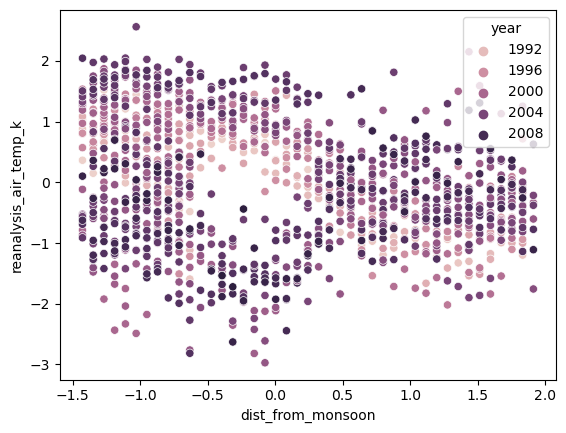

In [518]:
sns.scatterplot(data=df4, x='dist_from_monsoon', y='reanalysis_air_temp_k', hue='year')

In [226]:
X = df4.drop(['total_cases'], axis=1)
y = df4['total_cases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

rf = RandomForestRegressor(n_estimators=200)
rf.fit(X_train, y_train)

preds = rf.predict(X_test)

mean_absolute_error(y_test, (preds).astype(int))

13.677725118483412

In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor(n_estimators=200)

<AxesSubplot:xlabel='total_cases', ylabel='Count'>

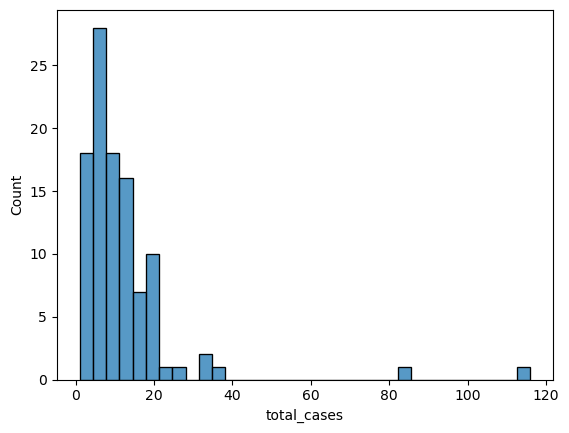

In [208]:
sns.histplot(data=df4[(df4['year'] == 2004.0)], x='total_cases')

### Testing data manipulation

In [519]:
test_data = pd.read_csv('dengue_features_test.csv')

In [533]:
test_data.head()

city  year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  2008          18      2008-04-29  -0.0189 -0.018900  0.102729   
1   sj  2008          19      2008-05-06  -0.0180 -0.012400  0.082043   
2   sj  2008          20      2008-05-13  -0.0015       NaN  0.151083   
3   sj  2008          21      2008-05-20      NaN -0.019867  0.124329   
4   sj  2008          22      2008-05-27   0.0568  0.039833  0.062267   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
0  0.091200                 78.60             298.492857   
1  0.072314                 12.56             298.475714   
2  0.091529                  3.66             299.455714   
3  0.125686                  0.00             299.690000   
4  0.075914                  0.76             299.780000   

   reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
0             298.550000                   294.527143   
1             298.557143                   294.395714   
2             299.357143                   295.308571   
3             299.728571                   294.402857   
4             299.671429                   294.760000   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      301.1                      296.4   
1                      300.8                      296.7   
2                      302.2                      296.4   
3                      303.0                      296.9   
4                      302.3                      297.3   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            25.37                             78.781429   
1                            21.83                             78.230000   
2                             4.12                             78.270000   
3                             2.20                             73.015714   
4                             4.36                             74.084286   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         78.60                              15.918571   
1                         12.56                              15.791429   
2                          3.66                              16.674286   
3                          0.00                              15.775714   
4                          0.76                              16.137143   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           3.128571           26.528571                 7.057143   
1           2.571429           26.071429                 5.557143   
2           4.428571           27.928571                 7.785714   
3           4.342857           28.057143                 6.271429   
4           3.542857           27.614286                 7.085714   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                33.3                21.7               75.2  
1                30.0                22.2               34.3  
2                32.8                22.8                3.0  
3                33.3                24.4                0.3  
4                33.3                23.3               84.1

In [534]:
# dropping dew point, diur_temp
test_data = test_data.drop(['reanalysis_dew_point_temp_k'], axis=1)

# diur_temp
test_data = test_data.drop(['station_diur_temp_rng_c', 'station_precip_mm', 'precipitation_amt_mm'], axis=1)

# remove station values
test_data = test_data.drop(['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c'], axis=1)

# remove avg temp
test_data = test_data.drop('reanalysis_avg_temp_k', axis=1)

# remove reanalysis_precip_amt_kg_per_m2
test_data = test_data.drop('reanalysis_precip_amt_kg_per_m2', axis=1)

In [536]:
test_data['reanalysis_tdtr_k'].fillna(test_data['reanalysis_tdtr_k'].mean(), inplace=True)
test_data['reanalysis_specific_humidity_g_per_kg'].fillna(test_data['reanalysis_specific_humidity_g_per_kg'].mean(), inplace=True)
test_data['reanalysis_sat_precip_amt_mm'].fillna(test_data['reanalysis_sat_precip_amt_mm'].mean(), inplace=True)
test_data['reanalysis_relative_humidity_percent'].fillna(test_data['reanalysis_relative_humidity_percent'].mean(), inplace=True)
test_data['reanalysis_min_air_temp_k'].fillna(test_data['reanalysis_min_air_temp_k'].mean(), inplace=True)
test_data['reanalysis_max_air_temp_k'].fillna(test_data['reanalysis_max_air_temp_k'].mean(), inplace=True)
test_data['reanalysis_air_temp_k'].fillna(test_data['reanalysis_air_temp_k'].mean(), inplace=True)
test_data['ndvi_sw'].fillna(test_data['ndvi_sw'].mean(), inplace=True)
test_data['ndvi_se'].fillna(test_data['ndvi_se'].mean(), inplace=True)

In [538]:
test_data['avg_ndvi'] = 0

In [542]:
for i in range(test_data.shape[0]):
    if not(math.isnan(test_data.iloc[i, 4])) and not(math.isnan(df.iloc[i, 5])):
        test_data.iloc[i,15] = (test_data.iloc[i, 4] + test_data.iloc[i, 5] + test_data.iloc[i, 6] + test_data.iloc[i, 7])/4
    elif math.isnan(test_data.iloc[i, 4]) and math.isnan(test_data.iloc[i, 5]):
        test_data.iloc[i,15] = (test_data.iloc[i, 6] + test_data.iloc[i, 7])/2
    elif math.isnan(test_data.iloc[i, 4]) and not(math.isnan(test_data.iloc[i, 5])):
        test_data.iloc[i,15] = (test_data.iloc[i, 5] + test_data.iloc[i, 6] + test_data.iloc[i, 7])/3
    else:
        test_data.iloc[i,15] = (test_data.iloc[i, 4] + test_data.iloc[i, 6] + test_data.iloc[i, 7])/3

In [543]:
test_data.head()

city  year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  2008          18      2008-04-29  -0.0189 -0.018900  0.102729   
1   sj  2008          19      2008-05-06  -0.0180 -0.012400  0.082043   
2   sj  2008          20      2008-05-13  -0.0015       NaN  0.151083   
3   sj  2008          21      2008-05-20      NaN -0.019867  0.124329   
4   sj  2008          22      2008-05-27   0.0568  0.039833  0.062267   

    ndvi_sw  reanalysis_air_temp_k  reanalysis_max_air_temp_k  \
0  0.091200             298.492857                      301.1   
1  0.072314             298.475714                      300.8   
2  0.091529             299.455714                      302.2   
3  0.125686             299.690000                      303.0   
4  0.075914             299.780000                      302.3   

   reanalysis_min_air_temp_k  reanalysis_relative_humidity_percent  \
0                      296.4                             78.781429   
1                      296.7                             78.230000   
2                      296.4                             78.270000   
3                      296.9                             73.015714   
4                      297.3                             74.084286   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         78.60                              15.918571   
1                         12.56                              15.791429   
2                          3.66                              16.674286   
3                          0.00                              15.775714   
4                          0.76                              16.137143   

   reanalysis_tdtr_k  avg_ndvi  
0           3.128571  0.039032  
1           2.571429  0.030989  
2           4.428571       NaN  
3           4.342857  0.076716  
4           3.542857  0.058704

In [539]:
test_data.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   0
ndvi_sw                                   0
reanalysis_air_temp_k                     0
reanalysis_max_air_temp_k                 0
reanalysis_min_air_temp_k                 0
reanalysis_relative_humidity_percent      0
reanalysis_sat_precip_amt_mm              0
reanalysis_specific_humidity_g_per_kg     0
reanalysis_tdtr_k                         0
avg_ndvi                                  0
dtype: int64

In [531]:
test2.head()

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  reanalysis_air_temp_k  \
0  -0.0189 -0.018900  0.102729  0.091200             298.492857   
1  -0.0180 -0.012400  0.082043  0.072314             298.475714   
2  -0.0015       NaN  0.151083  0.091529             299.455714   
3      NaN -0.019867  0.124329  0.125686             299.690000   
4   0.0568  0.039833  0.062267  0.075914             299.780000   

   reanalysis_max_air_temp_k  reanalysis_min_air_temp_k  \
0                      301.1                      296.4   
1                      300.8                      296.7   
2                      302.2                      296.4   
3                      303.0                      296.9   
4                      302.3                      297.3   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             78.781429                         78.60   
1                             78.230000                         12.56   
2                             78.270000                          3.66   
3                             73.015714                          0.00   
4                             74.084286                          0.76   

   reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  year  city_sj  \
0                              15.918571           3.128571  2008        1   
1                              15.791429           2.571429  2008        1   
2                              16.674286           4.428571  2008        1   
3                              15.775714           4.342857  2008        1   
4                              16.137143           3.542857  2008        1   

   month_02  month_03  month_04  month_05  month_06  month_07  month_08  \
0         0         0         1         0         0         0         0   
1         0         0         0         1         0         0         0   
2         0         0         0         1         0         0         0   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   month_09  month_10  month_11  month_12  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0

In [524]:
test_data['month'] = 0

In [529]:
#binning weeks into months

for i in range(test_data.shape[0]):
    
    test_data.iloc[i,15] = test_data.iloc[i, 3].split('-')[1]
test2 = test_data.drop(['weekofyear', 'week_start_date'], axis=1)

In [530]:
factor_cols = test2[['city', 'month', 'year']]
dummies = pd.get_dummies(factor_cols, drop_first=True)
test2 = test2.drop(['city', 'month', 'year'], axis=1)
test2 = pd.concat([test2, dummies], axis=1)